# **Módulo 2 Uso de framework o biblioteca de aprendizaje máquina para la implementación de una solución.**

Nombre: Carlos David Lozano Sanguino

Matricula: A01275316

# DATASET UTILIZADO: HEART DISEASE PREDICTION
Link: https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

Este conjunto de datos se utiliza comúnmente para la predicción de enfermedades cardíacas y contiene información médica y demográfica de pacientes.El conjunto de datos esta conformado por 4238 filas de datos y 16 columnas que representan las variables o caracteristicas del conjunto de datos, en total se tienen 67,808 datos en todo el dataframe. A continuación, se describen algunas de las principales características incluidas en el conjunto de datos:

Edad (age): La edad del paciente en años.

Sexo (sex): El género del paciente (0 = mujer, 1 = hombre).

Tipo de dolor de pecho (cp): Describe el tipo de dolor de pecho experimentado por el paciente. Puede tomar los valores 0, 1, 2 o 3, que representan diferentes tipos de dolor.

Presión arterial en reposo (trestbps): La presión arterial en reposo del paciente en mm Hg.

Colesterol sérico (chol): El nivel de colesterol sérico del paciente en mg/dL.

Azúcar en sangre en ayunas (fbs): Indica si el nivel de azúcar en sangre en ayunas del paciente está por encima de 120 mg/dL (1 = sí, 0 = no).

Resultado del electrocardiograma en reposo (restecg): Describe los resultados del electrocardiograma en reposo. Puede tomar los valores 0, 1 o 2.

Frecuencia cardíaca máxima (thalach): La frecuencia cardíaca máxima alcanzada por el paciente durante el ejercicio.

Angina inducida por ejercicio (exang): Indica si el paciente experimentó angina inducida por el ejercicio (1 = sí, 0 = no).

Depresión del segmento ST (oldpeak): La depresión del segmento ST en el electrocardiograma inducido por el ejercicio en relación con el descanso.

Pendiente del segmento ST máximo (slope): Describe la pendiente del segmento ST máximo en el electrocardiograma inducido por el ejercicio. Puede tomar los valores 0, 1 o 2.

Número de vasos principales coloreados por fluoroscopia (ca): El número de vasos principales coloreados por fluoroscopia durante la angiografía. Puede tomar valores de 0 a 3.

Talasemia (thal): Un factor hereditario que afecta la sangre. Puede tomar los valores 0, 1 o 2.

Enfermedad cardíaca (target): La variable objetivo que indica si el paciente tiene una enfermedad cardíaca (1 = sí, 0 = no).

El objetivo principal de este conjunto de datos es predecir si un paciente tiene o no una enfermedad cardíaca en función de estas características médicas y demográficas. Es un conjunto de datos valioso para tareas de clasificación y análisis predictivo relacionados con la salud cardíaca.

In [ ]:
df = pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df.shape

(4238, 16)

Limpieza de Datos

Analizamos los datos y veemos los valores nulos para poder trabajar mejor con los datos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Eliminamos la variable education que no nos sirve para este analisis

In [ ]:
df.drop('education', axis=1, inplace=True)
df.head(3)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


Sustituimos los valores nulos por las medias de cada variable

In [ ]:
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mean(),inplace=True)
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)

df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Analisis Exploratorio de los Datos

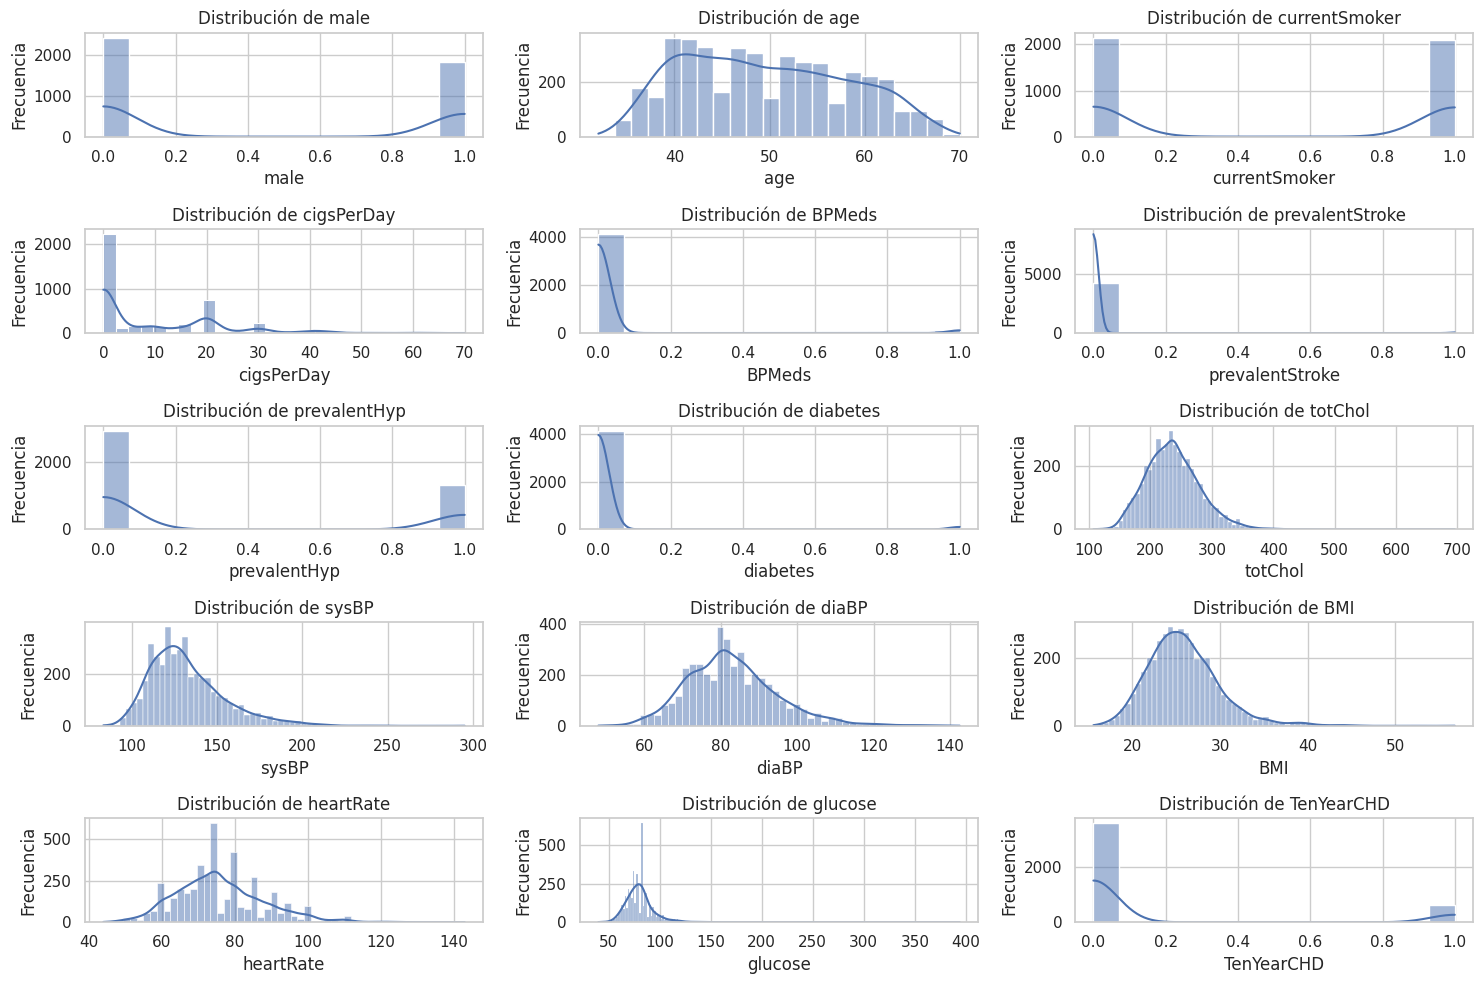

In [ ]:
# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Obtener la lista de variables numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular el número de filas y columnas necesarias
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear subgráficos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Loop para crear gráficas de distribución separadas para cada variable numérica
for i, column in enumerate(numeric_columns):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]

    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribución de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Eliminar subgráficos vacíos si el número de variables no es múltiplo de 3
for i in range(len(numeric_columns), n_cols * n_rows):
    fig.delaxes(axes[i // n_cols, i % n_cols])

plt.tight_layout()
plt.show()

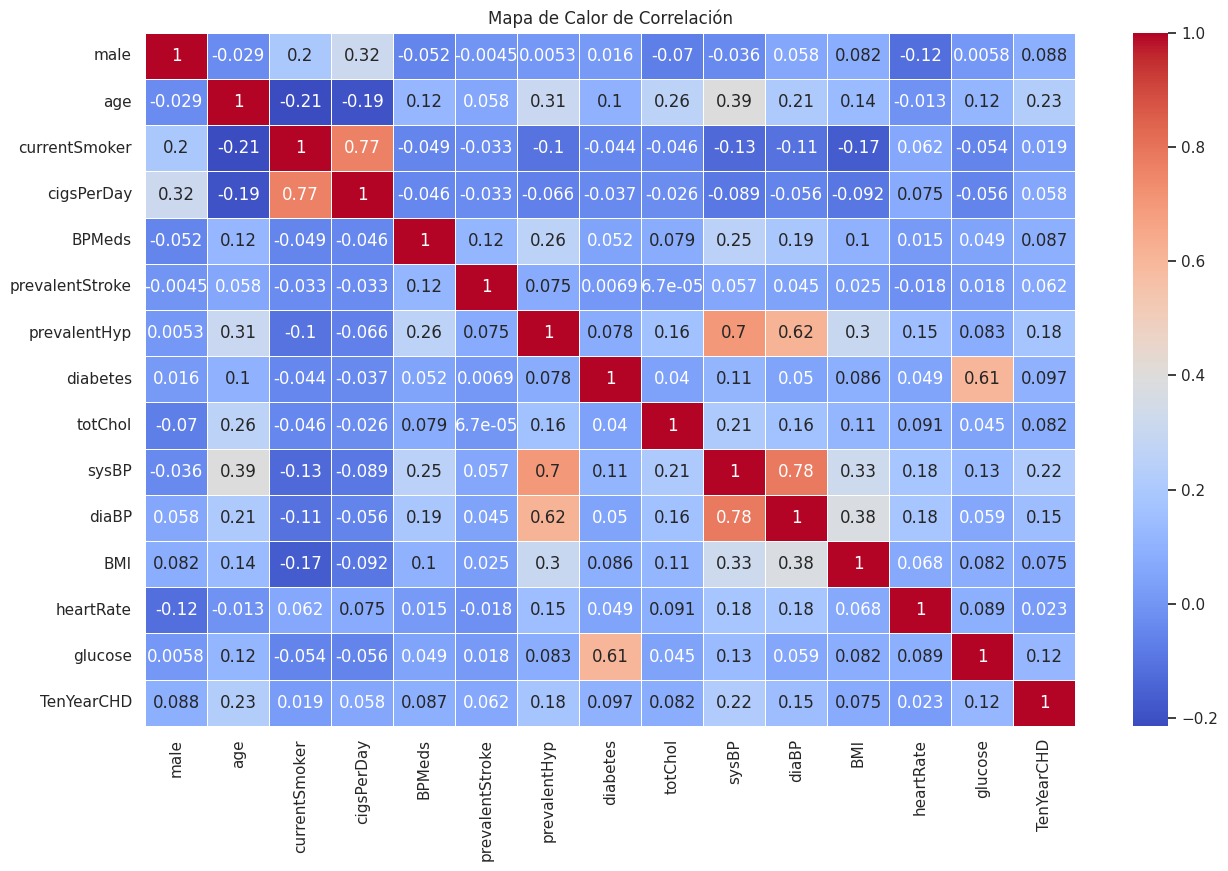

In [ ]:
correlation_matrix = df.corr()
correlation_matrix
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

# Regresion Logistica

Para la regresion logistica primero creamos una columna con todos los datos de signficancia para el modelo quitando la variable que define si tiene heart desease y creamos y con solo esa variable para asi dividir posteriormente el set de datos en subconjunto de entrenamiento y prueba, escalamos las caracteristicas y aplicamos la regresion logistica con sklearn

Justificacion del Cambio de Parametros:
Para la aplicacion de la Regresion Logistica se modificaron tres hiperparametros con el fin de mejorar la precision y rendimiento del modelo para la prediccion de datos y posteriores analisis del modelo junto al refinamiento del mismo. Los hiper parametros modificados son:
- test_size: este hiperparametro representa la cantidad de datos que sera proporcionada a los datos de prueba, el valor defecto seria 0.2 que significa que 20% de los datos va al conjunto de prueba y 80% va al conjunto de entrenamiento, el cambio para test size sera a 0.3 por lo tanto 30% ira al conjunto de prueba y 70% al conjunto de entrenamiento, este cambio tiene como proposito evaluar el rendimiento general de tu modelo en datos no vistos, no se aumento a 0.4 ya que ese porcentaje solo es para datasets que son mas pequeños y este caso es un dataset grande por lo que el valor optimo para evaluar el modelo seria 0.3

- random_state(En train_test_split): El parámetro random_state se utiliza para controlar la aleatoriedad en diversas operaciones que involucran números aleatorios en bibliotecas de Python como scikit-learn. Específicamente, en el contexto de divisiones de datos, como cuando se utiliza train_test_split para dividir un conjunto de datos en conjuntos de entrenamiento y prueba, random_state se utiliza para inicializar el generador de números aleatorios, el valor por defecto seria none lo que ignifica que cada vez que ejecutes el código, obtendrás una partición de datos diferente y una inicialización de pesos diferente en el modelo. Los resultados serán diferentes en cada ejecución debido a la aleatoriedad inherente.Mientras que al cambiar el valor a 42 va garantizar se obtendrá la misma partición de datos y la misma inicialización de pesos en el modelo en cada ejecución, lo que facilita la reproducibilidad de resultados.

- max_iter: Controla la cantidad máxima de veces que el algoritmo de regresión logística intentará ajustar los coeficientes en el proceso de entrenamiento. Cada iteración implica una actualización de los coeficientes basada en el gradiente descendente. Dada la cantidad de datos que hay siendoo 67,808 datos se aumento la cantidad de iteraciones de 1000 a 10000 para garantizar que el modelo tenga suficiente tiempo para converger

In [ ]:
X = df.drop(columns=["TenYearCHD"])
y = df[["TenYearCHD"]]
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
print(f"Precisión del Modelo: {accuracy :.2f}")

Precisión del Modelo: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Métricas en el Subconjunto de Entrenamiento:

- Matriz de Confusión en Entrenamiento: La matriz de confusión muestra el número de verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) y falsos negativos (FN). Esta métrica permite una comprensión detallada de cómo el modelo clasificó correctamente o incorrectamente los ejemplos en el conjunto de entrenamiento.

 -Reporte de Clasificación en Entrenamiento: El reporte de clasificación proporciona métricas como precisión, recuperación (recall), puntaje F1 y soporte para cada clase (en este caso, clase positiva y negativa). Estas métricas evalúan la calidad de las predicciones del modelo en el conjunto de entrenamiento.

- Precisión en Entrenamiento: La precisión en el conjunto de entrenamiento es la proporción de predicciones correctas sobre el total de predicciones realizadas en ese conjunto. Mide la capacidad del modelo para hacer predicciones precisas en los datos de entrenamiento.

In [ ]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Calcular y mostrar métricas en el conjunto de entrenamiento
print("Métricas en el Subconjunto de Entrenamiento:")
print("Matriz de Confusión en Entrenamiento:")
print(confusion_matrix(y_train, y_train_pred))
print("\nReporte de Clasificación en Entrenamiento:")
print(classification_report(y_train, y_train_pred))
print(f"Precisión en Entrenamiento: {accuracy_score(y_train, y_train_pred):.2f}")


Métricas en el Subconjunto de Entrenamiento:
Matriz de Confusión en Entrenamiento:
[[2495   15]
 [ 420   36]]

Reporte de Clasificación en Entrenamiento:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2510
           1       0.71      0.08      0.14       456

    accuracy                           0.85      2966
   macro avg       0.78      0.54      0.53      2966
weighted avg       0.83      0.85      0.80      2966

Precisión en Entrenamiento: 0.85


Métricas en el Subconjunto de Prueba:

- Matriz de Confusión en Prueba: Al igual que en el subconjunto de entrenamiento, esta matriz muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos en el conjunto de prueba. Permite evaluar cómo el modelo clasifica las muestras en el conjunto de prueba, que son datos no vistos durante el entrenamiento.

- Reporte de Clasificación en Prueba: Similar al reporte de clasificación en entrenamiento, proporciona métricas como precisión, recuperación, puntaje F1 y soporte para cada clase en el conjunto de prueba. Evalúa la calidad de las predicciones del modelo en datos no vistos.

- Precisión en Prueba: La precisión en el conjunto de prueba es la proporción de predicciones correctas sobre el total de predicciones realizadas en ese conjunto. Es una métrica importante para evaluar la capacidad del modelo para generalizar a nuevos datos no vistos durante el entrenamiento.

In [ ]:
# Calcular y mostrar métricas en el conjunto de prueba
print("\nMétricas en el Subconjunto de Prueba:")
print("Matriz de Confusión en Prueba:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación en Prueba:")
print(classification_report(y_test, y_pred))
print(f"Precisión en Prueba: {accuracy_score(y_test, y_pred):.2f}")


Métricas en el Subconjunto de Prueba:
Matriz de Confusión en Prueba:
[[1076    8]
 [ 168   20]]

Reporte de Clasificación en Prueba:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.71      0.11      0.19       188

    accuracy                           0.86      1272
   macro avg       0.79      0.55      0.55      1272
weighted avg       0.84      0.86      0.82      1272

Precisión en Prueba: 0.86


Al final obtenemos una precision alta y acurracy del 86% bastante buena pero podria ser mejor alterando y cambiando hiper parametros(Cambiar los que ya se han cambiado por que antes se tenia test_size como 20 y la acurracy era de 84 y al cambiar esto se elevo a 86 asi que cambiando esto junto el analisis de cada variable y su correlacion podria mejorar)

Prueba de Predicciones con nuevos datos

Para la prediccion de nuevos datos agarramos 3 datos nuevos que no son parte del subset de datos de entrenamiento y lo ponemos en el modelo entrenado y asi comparamos con los valores reales o etiquetas reales y_test y podemos ver que predice los 3 primeros valores a la perfeccion por lo tanto hace bien la prediccion, a medida que incremente la cantidad de pruebas puede igual equivocarse en algunos por que su precision es de 86% es buena pero no es perfecta para todos los datos a predecir

In [ ]:
# Obtener las primeras 3 instancias del conjunto de datos de entrada
primeras_tres_instancias = X_test[:3]

# Realizar predicciones solo en las primeras 3 instancias
predicciones = model.predict(primeras_tres_instancias)

# Obtener las etiquetas reales correspondientes a las primeras 3 instancias
etiquetas_reales = y_test[:3]
etiquetas_reales = np.array(etiquetas_reales)

# Imprimir las predicciones y las etiquetas reales
for i in range(3):
    print(f"Instancia {i + 1}: Predicción = {predicciones[i]}, Etiqueta Real = {etiquetas_reales[i]}")

Instancia 1: Predicción = 0, Etiqueta Real = [0]
Instancia 2: Predicción = 0, Etiqueta Real = [0]
Instancia 3: Predicción = 0, Etiqueta Real = [0]
